# Clustering Evaluation Measures
Evaluating the effectiveness of the clustering results, known as clustering evaluation or validation, is essential to the success of clustering applications. It ensures that the clustering algorithm has identified meaningful clusters in the data, and not just artifacts of random noise. In addition, it can be used to determine which clustering algorithm is best suited for a particular dataset and task, and to tune the hyperparameters of these algorithms (such as the number of clusters in k-means, or the density parameters in DBSCAN).

While supervised learning techniques have clear performance measures such as accuracy, precision and recall, evaluating clustering algorithms is more challenging for the following reasons:

- Since clustering is an unsupervised learning method, there are no ground truth labels against which the clustering results can be compared.
- Determining the "correct" number of clusters or the "best" clustering is often a subjective decision, even for domain experts. What one considers as a meaningful cluster, another might dismiss as coincidental.
- In many real-world datasets, the boundaries between clusters are not clear-cut. Some data points might sit at the boundary of two clusters and could be reasonably assigned to both.
- Different applications might prioritize different aspects of clustering. For example, in one application, it might be essential to have tight, well-separated clusters, while in another, capturing the overall data structure might be more important.

In general, we distinguish between two types of clustering evaluation measures (or metrics):

1. **Internal measures** do not require any ground truth to assess the quality of clusters. They are based solely on the data and the clustering results.
2. **External measures** compare the clustering results to ground truth labels.

Typically, in real-world applications, external information such as ground truth labels is not available, making internal metrics the only viable option for cluster validation.

## Internal Evaluation Measures
Since the goal of clustering is to make objects within the same cluster similar and objects in different clusters distinct, most internal validation measures are based on the following two criteria:

1. **Compactness** measures how closely related objects in the same cluster are. Compactness can be measured in different ways, such as by using the variance of the points within each cluster, or computing the average pairwise distance between them.
2. **Separation** measures how distinct or well-separated a cluster is from other clusters. Examples for measures of separation include pairwise distances between cluster centers or pairwise minimum distances between objects in different clusters.

## Silhouette Index
<hr>
The silhouette index (or score) measures the degree of separation between clusters by comparing each object's similarity to its own cluster against its similarity to objects in other clusters.

We first define the **silhouette coefficient** of a data point $x_i$ as:

$$s(x_i) = \frac{b(x_i) - a(x_i)}{\text{max}\{a(x_i), b(x_i)\}}$$

where:
- $a(x_i)$ is the average distance between $x_i$ and all the other data points in its cluster. More formally, if point $x_i$ belongs to cluster $C_i$, then

$$a(x_i) = \frac{1}{|C_i| - 1} \sum_{x_j \in C_i, j \neq i} d(x_i, x_j)$$

> where $d(x_i, x_j)$ is the distance between points $x_i$ and $x_j$. We can interpret $a(x_i)$ as a measure of how well point $x_i$ is matched to its own cluster (the smaller the value, the better the match). Note that $a(x_i)$ is not clearly defined for clusters with size $1$, in which case we set $a(x_i) = 0$.

- $b(x_i)$ is the average distance between $x_i$ and the points in its neighboring cluster, i.e., the cluster whose points have the smallest average distance to $x_i$:

$$b(x_i) = \text{min}_{j \neq i} \frac{1}{|C_j|} \sum_{x_j \in C_j} d(x_i, x_j) $$

The silhouette coefficient ranges from -1 to +1, where a high value indicates that the point is well matched to its own cluster and poorly matched to neighboring clusters.

Based on the silhouette coefficients of the samples, we now define the **silhouette index (SI)** as the average of the coefficients over all the data points:

$$ \text{SI} = \frac{1}{n} \sum_{i=1}^n s(x_i) $$

where $n$ is the total number of data points.

The silhouette index provides an overall measure for the quality of the clustering:
- An index close to 1 means that the clusters are compact and well separated.
- An index around 0 indicates overlapping clusters.
- An index close to -1 means the clustering has either too many or too few clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

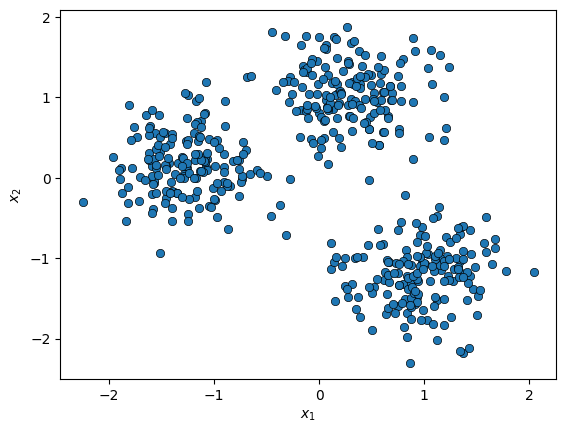

In [2]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)

def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

plot_data(X)

Next, we run k-means clustering on this dataset with $k = 2, 3, 4$, and store the clustering results in three different variables:

In [4]:
from sklearn.cluster import KMeans

labels_k2 = KMeans(n_clusters=2, n_init='auto', random_state=0).fit_predict(X)
labels_k3 = KMeans(n_clusters=3, n_init='auto', random_state=0).fit_predict(X)
labels_k4 = KMeans(n_clusters=4, n_init='auto', random_state=0).fit_predict(X)

In [5]:
from sklearn.metrics import silhouette_score

print(f'SI(2 clusters): {silhouette_score(X, labels_k2):.3f}')
print(f'SI(3 clusters): {silhouette_score(X, labels_k3):.3f}')
print(f'SI(4 clusters): {silhouette_score(X, labels_k4):.3f}')

SI(2 clusters): 0.570
SI(3 clusters): 0.659
SI(4 clusters): 0.528


As expected, the highest silhouette score is obtained for k = 3. The score is below 1, indicating that the clusters are not completely separated from each other.

Other internal metrics include (not exhaustive list):
- **Calinski-Harabasz Index**
- **Davies-Bouldin Index**

## External Evaluation Measures
External evaluation measures are used when the true labels of the data points are known. These measures compare the the results of the clustering algorithm against the ground truth labels.

## Fowlkes-Mallows Index
<hr>
The Fowlkes-Mallows Index (FMI) is defined as the geometric mean of the pairwise precision (the accuracy of grouped pairs of points) and recall (the completeness of correctly grouping pairs that belong together):

$$\text{FMI} = \frac{TP}{\sqrt{(TP + FP) (TP + FN)}}$$

where:
- TP (True Positive) is the number of pairs of points that have the same class label and belong to the same cluster.
- FP (False Positive) is the number of pairs of points that have different class labels but are assigned to the same cluster.
- FN (False Negative) is the number of pairs of points that have the same class labels but are assigned to different clusters.

The FMI score ranges from 0 to 1, where 0 indicates no correlation between the clustering results and the true labels, and 1 represents a perfect correlation.

In [6]:
from sklearn.metrics import fowlkes_mallows_score

true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 0, 1, 1, 2, 2]

print(f'FMI = {fowlkes_mallows_score(true_labels, cluster_labels):.3f}')

FMI = 0.471


In this case, $TP = 2, FP = 1,$ and $FN = 4,$ thus:

$$\text{FMI} = \frac{2}{\sqrt{(2 + 1)(2 + 4)}} = \frac{2}{\sqrt{18}} = 0.471$$

Cluster assignments that are independent of the class labels have a zero FMI score:

In [7]:
true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 1, 2, 0, 1, 2]

print(f'FMI = {fowlkes_mallows_score(true_labels, cluster_labels):.3f}')

FMI = 0.000


Summary
The following table summarizes the characteristics of the different measures discussed:

<div style="align:center">
    <img src="media/evals.png" width=800>
</div>